In [1]:
from pathlib import Path
from matplotlib.font_manager import fontManager
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
inpDir=Path('..')/".."/"input"

outDir=Path("..")/'output'

RANDOM_SATE=24
np.random.seed(RANDOM_SATE)
rng=np.random.default_rng(seed=RANDOM_SATE)

TEST_SIZE=0.2
NOISE=0.2
EPOCHS=201
ALPHA=0.001
N_SAMPLE=1000

In [3]:
X,y=make_moons(n_samples=N_SAMPLE,shuffle=True,noise=NOISE,random_state=RANDOM_SATE)
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [4]:
X[:5],y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0]))

In [5]:
X.shape,y.shape

((1000, 2), (1000,))

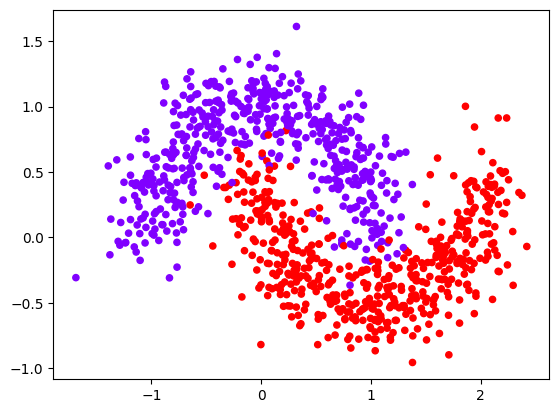

In [ ]:
plt.scatter(x=X[:,0],y=X[:,1],s=20,c=y,marker="o",cmap='rainbow',)
plt.show()

In [7]:
data_df=pd.DataFrame(X,columns=['A',"B"])
data_df['target']=y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [30]:
data_train,data_test=data_df.to_numpy()[:900],data_df.to_numpy()[900:]
data_train.shape,data_test.shape

((900, 3), (100, 3))

In [55]:

def predict(row,weights):
    z=weights[0]
    for i in range(len(row)-1):
        z+=weights[i+1]*row[i]
    return 1 if z>0 else 0

In [56]:
weights=np.array([0.1,2.1,1.0])
predict(data_df.loc[0].to_numpy(),weights)

1

In [72]:
def train_weight(train,alpha,n_epoch):
    error=[]
    weight=rng.random(train.shape[1]) # initialize weights
    m=train.shape[0]
    for epoch in range(n_epoch):
        sum_error=0
        for row in train:
            prediction=predict(row,weight)
            dz=prediction-row[-1]
            sum_error+=(prediction-row[-1]**2)
            weight[0]=weight[0]-alpha*dz
            for i in range(len(row)-1):
                weight[i+1]=weight[i+1]-alpha*dz*row[i]
        error.append(sum_error/m) #Average

    return error,weight
            



In [73]:
error,weights=train_weight(train=data_train,alpha=ALPHA,n_epoch=EPOCHS)
len(error),len(weights)

(201, 3)

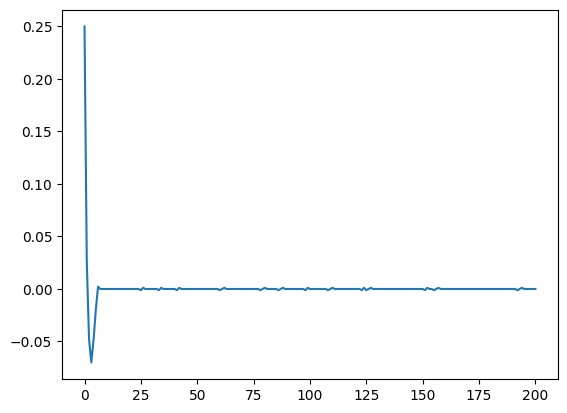

In [74]:
plt.plot(error)

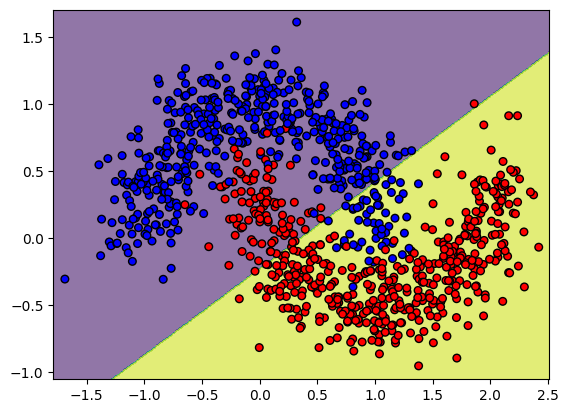

In [79]:
from numpy import meshgrid


fig,ax=plt.subplots()
dm=0.01
margin=10*dm

X_max,x_min=X[:,0].max()+margin,X[:,0].min()-margin
y_max,y_min=X[:,1].max()+margin,X[:,1].min()-margin

xx,yy=np.meshgrid(np.arange(x_min,X_max,dm),(np.arange(y_min,y_max,dm)))

X_plot=np.c_[xx.ravel(),yy.ravel()]

X_plot=np.hstack((X_plot,np.ones((X_plot.shape[0],1))))

y_pred = []

for row  in (X_plot):
    y_p=predict(row,weights)
    y_pred.append(y_p)

Z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx,yy,Z,alpha=0.6,cmap='viridis')
ax.scatter(X[:,0],X[:,1],c=y,s=30,edgecolors="k",cmap=plt.cm.bwr)

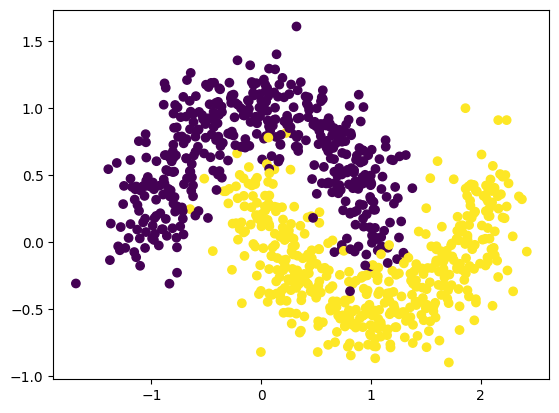

In [47]:
plt.scatter(data_train[:,0],data_train[:,1],c=data_train[:,-1])